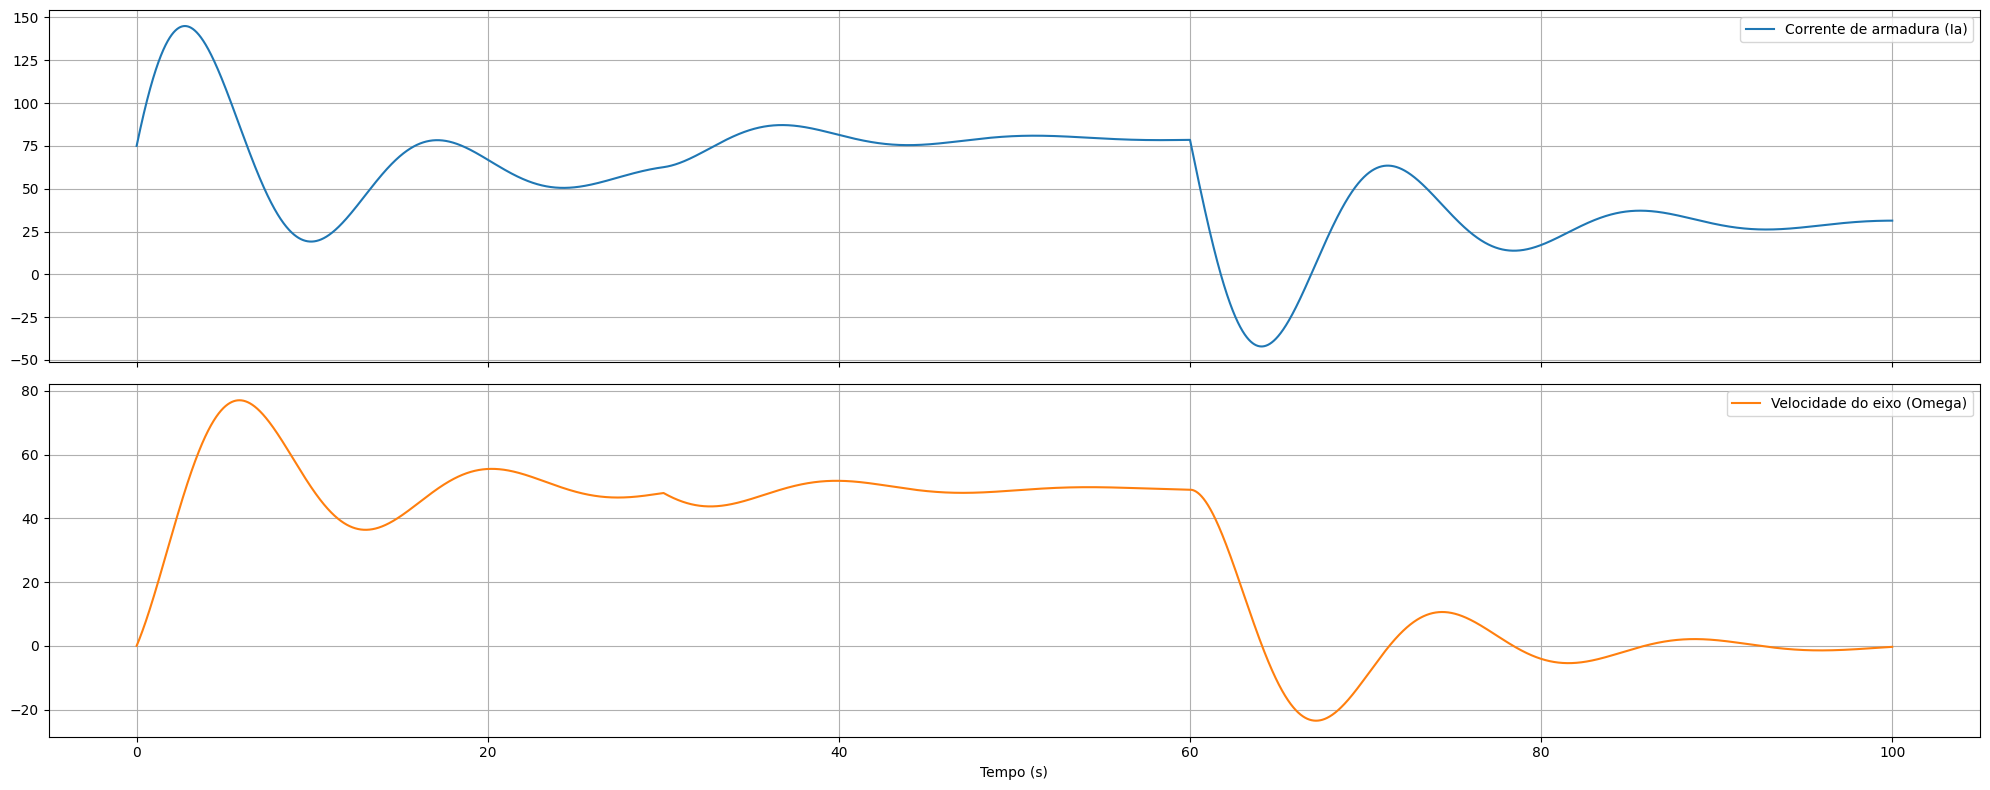

In [16]:
import pandas as pd
import numpy as np

# Parâmetros do sistema
t_total = 100
dt = 0.001
npassos = int(t_total / dt)

# Parâmetros do sistema

ra = 0.01
la = 1.0
B = 1.0
J = 5.0
km = 1.0

# Inicialização das variáveis
ia = np.zeros(npassos)
omega = np.zeros(npassos)
va = np.full(npassos, 50.0)  # Inicializa va como array onde todos os npassos valores são 50.0
Tm = np.full(npassos, 10.0)  # Inicializa Tm como array onde todos os npassos valores são 10.0

# Usando linspace para gerar t (tempo)
t = np.linspace(0, ttotal, npassos)

# Condições iniciais
# omega[0] = 0.0 Não é necessário!!
ia[0] = 75.0

# Atualização de va e Tm de acordo com o tempo
va[int(60.0 / dt):] = 0.0  # Após 60s, va = 0
Tm[int(30.0 / dt):] = 30.0  # Após 30s, Tm = 30

# Loop de integração
for i in range(npassos - 1):
    ia[i + 1] = ia[i] + (((va[i] - (km * omega[i])) / la) - ((ra / la) * ia[i])) * dt
    omega[i + 1] = omega[i] + ((((km * ia[i]) - Tm[i]) / J) - ((B / J) * omega[i])) * dt

# Criando o DataFrame para visualização
df = pd.DataFrame({
    'Tempo (s)': t,
    'Corrente de armadura (Ia)': ia,
    'Velocidade do eixo (Omega)': omega
})

# Plotando apenas a corrente de armadura e a velocidade do eixo
df.plot(x='Tempo (s)', y=['Corrente de armadura (Ia)', 'Velocidade do eixo (Omega)'], subplots=True, figsize=(20, 8), grid=True)

# Ajustar o layout do gráfico
plt.tight_layout()
plt.show()

In [15]:
df

,Tempo (s),Corrente de armadura (Ia),Velocidade do eixo (Omega)
0,0.000,75.000000,0.000000
1,0.001,75.049250,0.013000
2,0.002,75.098487,0.026007
3,0.003,75.147710,0.039022
4,0.004,75.196919,0.052043
...,...,...,...
99995,99.995,31.357571,-0.320623
99996,99.996,31.357578,-0.320288
99997,99.997,31.357585,-0.319952
99998,99.998,31.357591,-0.319617
